# Rovibrational Spectra Fitting Notebook

In this notebook, you will read in your data from a simplified CSV file and process it in order to determine the fundamental vibrational frequency and rotational constants for a rovibrational spectrum.  This data can then be utilized for subsequent thermodynamics calculations with statistical mechanics (not done in this notebook).

The fitting procedure in this notebook assumes a quadratic form for the P & R branches of a rovibrational spectrum. This ammounts to neglecting the centrifugal distortion contribution to the energy of a given term resulting in the following formula for the peak positions:

$
\tilde{\omega}(m) = \tilde{\omega}_0 + (2 \tilde{B}_{e} - 2 \tilde{\alpha}_{e}) m - \tilde{\alpha}_{e} m^2
$

where $m$ is either $J+1$ for the R branch or $-J$ for the P branch, $\tilde{B}_e$ is the rotational constant at equilibrium and $\tilde{\alpha}_e$ is the first-term rotational constant. $\tilde{\omega}_0$ is the fundamental vibrational frequency, including anharmonicity,

$
\tilde{\omega}_0 = \tilde{\omega_e} - 2 \tilde{\omega}_e x_{e} \, ,
$

where $\tilde{\omega}_0$ is the harmonic vibrational frequency, and $\tilde{\omega}_e x_e$ is the anharmonicity correction (in cm$^{-1}$).

In [ ]:
# Import needed libraries for data analysis
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from google.colab import files

# Helper Functions & Fundamental Constants
Execute this group of cells to prepare the Helper Functions for data analysis.

**You should not be modifying anything in this section!**

This section contains useful functions and constants to accomplish the goals of the notebook.

In [ ]:
# Planck's constant - J*s
hplanck =  6.62607004E-34

# speed of light - m/s
clight = 299792458

# amu to kg conversion factor - kg / amu
amu2kg = 1.660538782E-27

# Ideal gas constant - J/(mol*K)
Rgas = 8.3144598

# Isotopic masses taken from : https://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl?ele=&ascii=html&isotype=some
# H atomic mass
Hmass = 1.00782503223
# D atomic mass
Dmass = 2.01410177812
# Cl-35 atomic mass
Cl35mass = 34.968852682
# Cl-37 atomic mass
Cl37mass = 36.965902602

In [ ]:
# Step i: Import CSV file containing the {x, y} data (m and frequency)
def import_data(filename):
    # Read the CSV file with no headers
    df = pd.read_csv(filename, header=None, names=['m', 'frequency'])
    return df

# Step ii: Define the quadratic function to fit
def quadratic_model(m, omega_0, Be, alpha_e):
    # Formula: nu(m) = omega_0 + (2 Be - 2 alpha_e) m - alpha_e m^2
    return omega_0 + (2 * Be - 2 * alpha_e) * m - alpha_e * m**2

# Step iii: Fit the data to the quadratic model and output the constants with uncertainties
def fit_data(df):
    m_values = df['m'].values
    frequency_values = df['frequency'].values

    # Initial guess for the parameters [omega_0, Be, alpha_e]
    initial_guess = [1000, 1, 0.1]

    # Perform the curve fit
    popt, pcov = curve_fit(quadratic_model, m_values, frequency_values, p0=initial_guess)

    # Extract fit parameters and uncertainties
    omega_0, Be, alpha_e = popt
    uncertainties = np.sqrt(np.diag(pcov))  # Get standard deviations of the parameters

    # Output the fit constants and uncertainties to 4 decimal places
    print(f"Fit results:")
    print(f"omega_0 = {omega_0:.4f} ± {uncertainties[0]:.4f} wavenumbers")
    print(f"Be = {Be:.4f} ± {uncertainties[1]:.4f} wavenumbers")
    print(f"alpha_e = {alpha_e:.4f} ± {uncertainties[2]:.4f} wavenumbers$")

    return popt

# Step iv: Plot the data points and the fitted curve
def plot_fit(df, popt):
    m_values = df['m'].values
    frequency_values = df['frequency'].values

    # Generate fitted curve data
    m_fit = np.linspace(min(m_values), max(m_values), 100)
    frequency_fit = quadratic_model(m_fit, *popt)

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(m_values, frequency_values, label='Data', color='blue', marker='o')
    plt.plot(m_fit, frequency_fit, label='Fitted curve', color='red')
    plt.xlabel('Quantum number m')
    plt.ylabel('Frequency (cm$^{-1}$)')
    plt.title('Rovibrational Spectroscopy Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

# Instructions

Execute the cells below to perform the non-linear fitting of the transition frequencies vs quantum number collected during your experiment. The final output should be a summary of the rotational and vibrational constants with their uncertainties.

# Import Experimental Data - CSV

Execute the cell below, select the data file you wish to analyze, and then proceed with the subsequent steps.

In [ ]:
# Step 1: Upload data file
uploaded = files.upload()

# Step 2: Retrieve the file name
file_name = list(uploaded.keys())[0]

# Step 3: Print the file name
print(f"Uploaded file name: {file_name}")

Saving hcl_data.csv to hcl_data.csv
Uploaded file name: hcl_data.csv


# Convert data to DataFrame and perform a nonlinear fit of the data

In [ ]:
# Step 4: Convert to DataFrame
df = import_data(file_name)

# Step 5: Fit the data and get the fit constants with uncertainties
popt = fit_data(df)

Fit results:
omega_0 = 2886.0868 ± 0.2300 wavenumbers
Be = 10.4908 ± 0.0107 wavenumbers
alpha_e = 0.3064 ± 0.0030 wavenumbers$


# Plot the data and the fit together

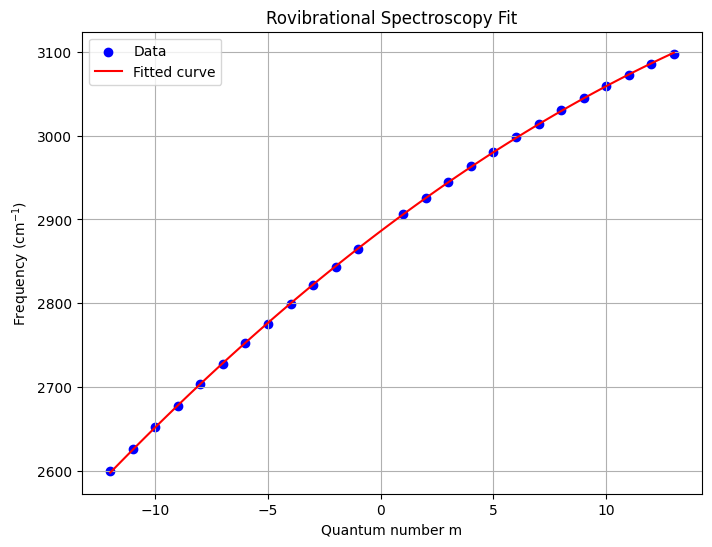

In [ ]:
# Step iv: Plot the data and the fit
plot_fit(df, popt)

# Calculate the moment of inertia and the reduced mass of your molecule

Calculate the moment of inertia through its connection with $\tilde{B}_e$:

$
I = \frac{h}{8\pi^2 \, c \, \tilde{B}_e}
$

where $c$ is the speed of light (**in cm/s**) and $h$ is Planck's constant.

In a separate calculation, determine the moment of inertia of your molecule. For a diatomic molecule the reduced mass is simply:

$\mu = \frac{m_1 m_2}{m_1 + m_2}$

You will need to calcualte this in SI units (kg).

In [ ]:
# Moment of inertia calculation
moment_of_inertia = hplanck / (8*np.pi**2 * (clight * 100) * popt[1])

# Print moment of inertia
print(f"Moment of inertia: {moment_of_inertia:.4E} kg m^2")

# reduced mass calculation or input ; ex H--Cl-35
reduced_mass = (Hmass * Cl35mass) / (Hmass + Cl35mass) * amu2kg

# Print reduced mass
print(f"Reduced mass: {reduced_mass:.4E} kg")

Moment of inertia: 2.6683E-47 kg m^2
Reduced mass: 1.6267E-27 kg


# Calculate the bond length of your molecule

Using the moment of inertia, calculate the bond length for a diatomic molecule:

$
R_e = \sqrt{\frac{I}{\mu}}
$

In [ ]:
# Equilibrium bond length calculation
bond_length = np.sqrt(moment_of_inertia/reduced_mass)

# Print bond length
print(f"Equilibrium bond length: {bond_length:.4E} m")

Equilibrium bond length: 1.2808E-10 m
